# IMDB Data Analysis
#### Ruhit Debnath
Data Science Intern <br>
<b>CodersCave<b>

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Science Task -  Analyzing the IMDB Dataset of Top 1000 Movies and TV Shows using Pandas


# Objective:

In this task you are requested to analyze the top rated movies and TV shows on IMDB Dataset to find out which genre is the most popular and which director has the most top-rated movies/TV shows.

Steps:

# Download the IMDB dataset of top 1000 movies and TV shows from Kaggle and load it into a pandas dataframe using the read_csv() function.
- Clean and preprocess the data by removing unnecessary columns and handling missing values.
- Explore the data to identify the most popular genre of movies and TV shows using pandas.
- Create a new dataframe containing the count of movies/TV shows in each genre using pandas.
- Visualize the data using a bar chart to show the most popular genre of movies/TV shows using pandas and the matplotlib library.
- Identify the director with the most top-rated movies/TV shows by creating a new dataframe containing the count of movies/TV shows directed by each director using pandas.
- Visualize the data using a bar chart to show the director with the most top-rated movies/TV shows using pandas and matplotlib.
- Write a report summarizing your analysis and findings, including any insights or observations you discovered, using - markdown cells in the Jupyter notebook.


In [3]:
# read data 
data = pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
data.shape

(1000, 16)

In [6]:
def get_features_data_types(df):
    feature_types = df.dtypes.rename('type').reset_index().rename(columns={'index':'feature'})
    return feature_types

In [7]:
def get_feature_stats(df):
    stats = df.isna().sum().rename('num_of_missing').reset_index().rename(columns={'index':'feature'})
    stats['percentage_of_missing'] = stats['num_of_missing']/df.shape[0]
    
    feature_types = get_features_data_types(df)
    
    stats = stats.merge(feature_types,
                       left_on='feature',
                       right_on='feature',
                       how='left')
    return stats

In [8]:
missing_stats = get_feature_stats(data).sort_values(by="percentage_of_missing", ascending=False) 
missing_stats

,feature,num_of_missing,percentage_of_missing,type
15,Gross,169,0.169,object
8,Meta_score,157,0.157,float64
3,Certificate,101,0.101,object
0,Poster_Link,0,0.000,object
1,Series_Title,0,0.000,object
2,Released_Year,0,0.000,object
4,Runtime,0,0.000,object
5,Genre,0,0.000,object
6,IMDB_Rating,0,0.000,float64
7,Overview,0,0.000,object


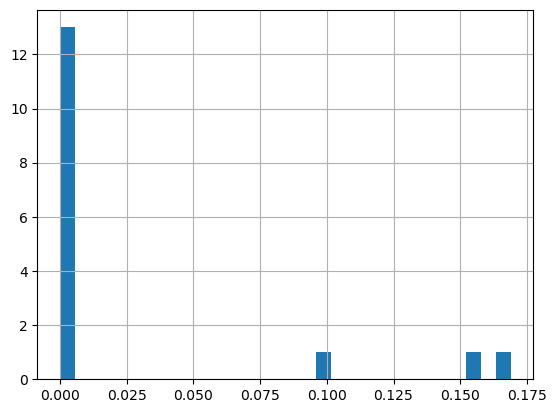

In [9]:
missing_stats['percentage_of_missing'].hist(bins=30)
plt.show()

In [10]:
for one_feature in missing_stats['feature'].values:
    data = data[data[one_feature].notna()]

In [11]:
data.shape

(714, 16)

In [12]:
(1000 - 714) /1000

0.286

# EDA (Exploratory data analysis)


In [13]:
# try to see the numeric features

# select just numerical data
data_numeric = data.select_dtypes(exclude=['object']).copy()

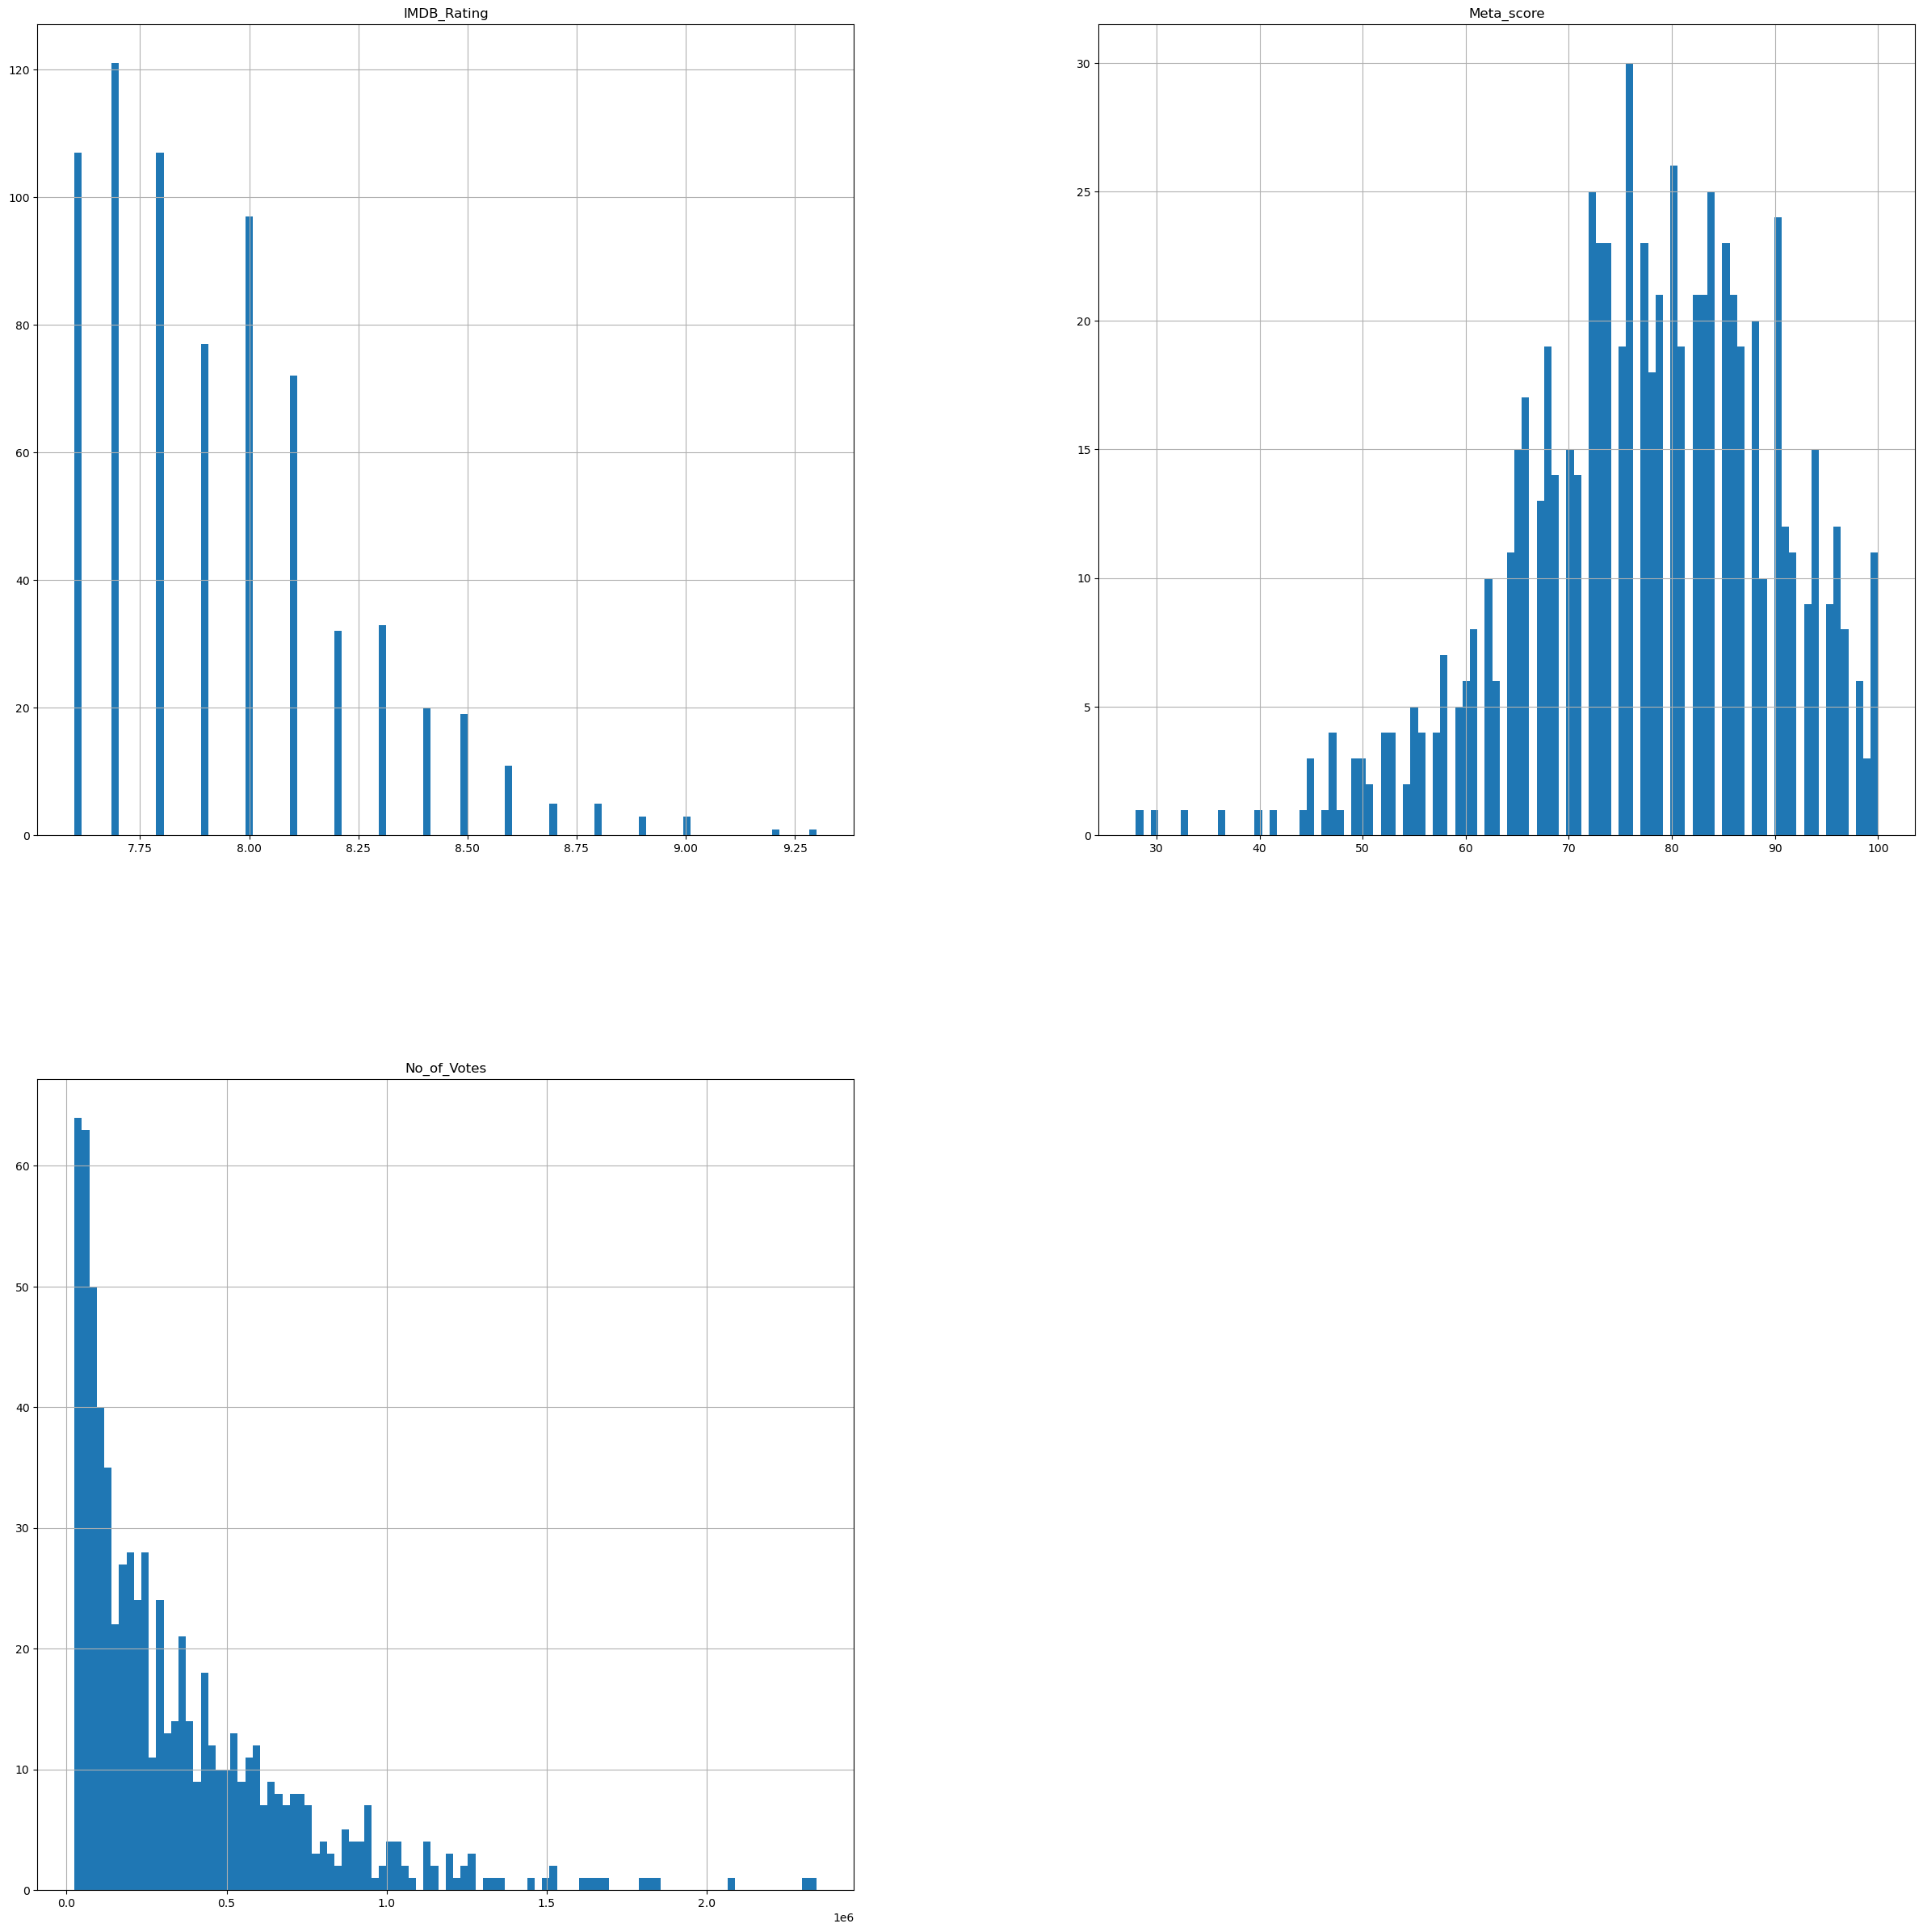

In [14]:
data_numeric.hist(bins=100, figsize=(30,30))
plt.show() 

In [15]:

#we can see that null values are a very small percentage (around 0.025 %) so we can drop them
# data.dropna(inplace=True)

#removing unnecessary columns
cols = ['Poster_Link','Released_Year','Certificate','Runtime','Overview']

data.drop(columns=cols,inplace=True)
data

,Series_Title,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,Kelly's Heroes,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,The Jungle Book,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,A Hard Day's Night,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [16]:
#step 3
data['Genre'].value_counts()
post_popular_genre = data['Genre'].value_counts()
print(post_popular_genre)

Drama                         58
Drama, Romance                26
Comedy, Drama                 24
Crime, Drama, Thriller        22
Action, Adventure, Sci-Fi     21
                              ..
Crime, Film-Noir, Thriller     1
Drama, Film-Noir, Romance      1
Drama, History, Romance        1
Adventure, Horror, Sci-Fi      1
Comedy, Music, Musical         1
Name: Genre, Length: 172, dtype: int64


In [17]:
#step 3
data['Genre'].value_counts()
post_popular_genre = data['Genre'].value_counts()
post_popular_genre

Drama                         58
Drama, Romance                26
Comedy, Drama                 24
Crime, Drama, Thriller        22
Action, Adventure, Sci-Fi     21
                              ..
Crime, Film-Noir, Thriller     1
Drama, Film-Noir, Romance      1
Drama, History, Romance        1
Adventure, Horror, Sci-Fi      1
Comedy, Music, Musical         1
Name: Genre, Length: 172, dtype: int64

In [18]:
#step 4
new_df = data.Genre.value_counts()

new_df

Drama                         58
Drama, Romance                26
Comedy, Drama                 24
Crime, Drama, Thriller        22
Action, Adventure, Sci-Fi     21
                              ..
Crime, Film-Noir, Thriller     1
Drama, Film-Noir, Romance      1
Drama, History, Romance        1
Adventure, Horror, Sci-Fi      1
Comedy, Music, Musical         1
Name: Genre, Length: 172, dtype: int64

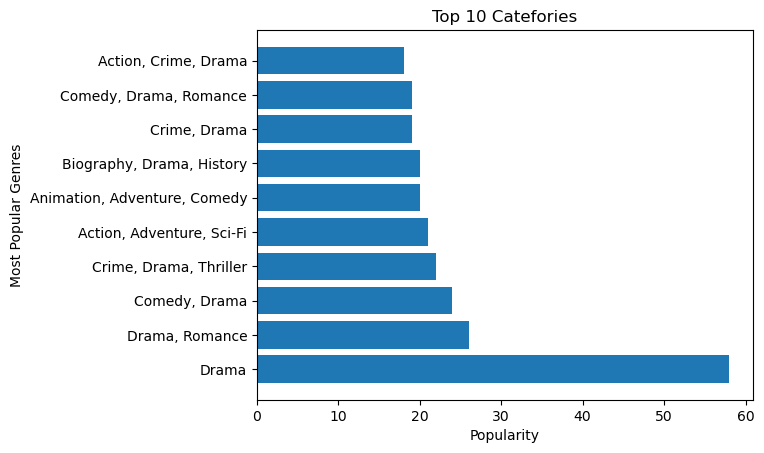

In [19]:
#step 5
# import matplotlib.pyplot as mpl

movies = new_df[0:10].index
count = list(new_df.iloc[:10])

plt.barh(movies,count)
plt.ylabel("Most Popular Genres")
plt.xlabel("Popularity")
plt.title("Top 10 Catefories")
plt.show()

In [20]:
#step 6
Director_count_df = data.Director.value_counts()
Director_count_df

Steven Spielberg        13
Martin Scorsese         10
Alfred Hitchcock         9
Christopher Nolan        8
Clint Eastwood           8
                        ..
Jon Favreau              1
Yimou Zhang              1
Danis Tanovic            1
Shin'ichirô Watanabe     1
Richard Lester           1
Name: Director, Length: 402, dtype: int64

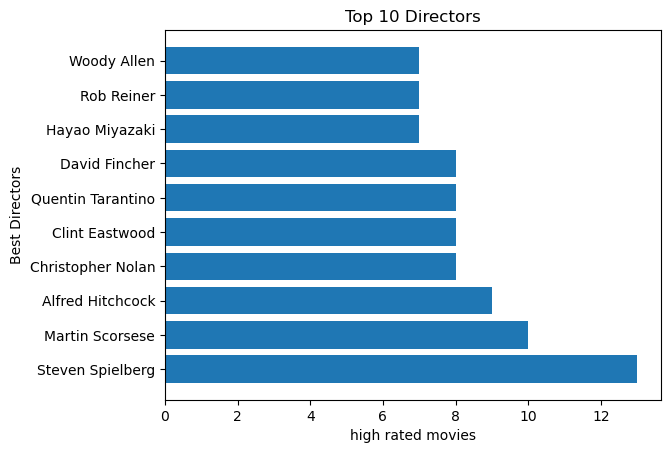

In [21]:
#step 7
directors = Director_count_df[0:10].index
counter = list(Director_count_df.iloc[:10])
plt.barh(directors,counter)
plt.ylabel("Best Directors")
plt.xlabel("high rated movies")
plt.title("Top 10 Directors")
plt.show()